In [1]:
#Importing pandas and numpy and visualization.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Lets import the CSV file which has the data
custseg = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\Mall_Customers.csv')
custseg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Checking the shape of the dataset
custseg.shape


(200, 5)

In [4]:
#Checking the dataset contains the null data or not
custseg.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Describing the dataset
custseg.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Since customer id attribute is not required we will remove it
custseg.drop('CustomerID', inplace=True, axis=1)
custseg.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


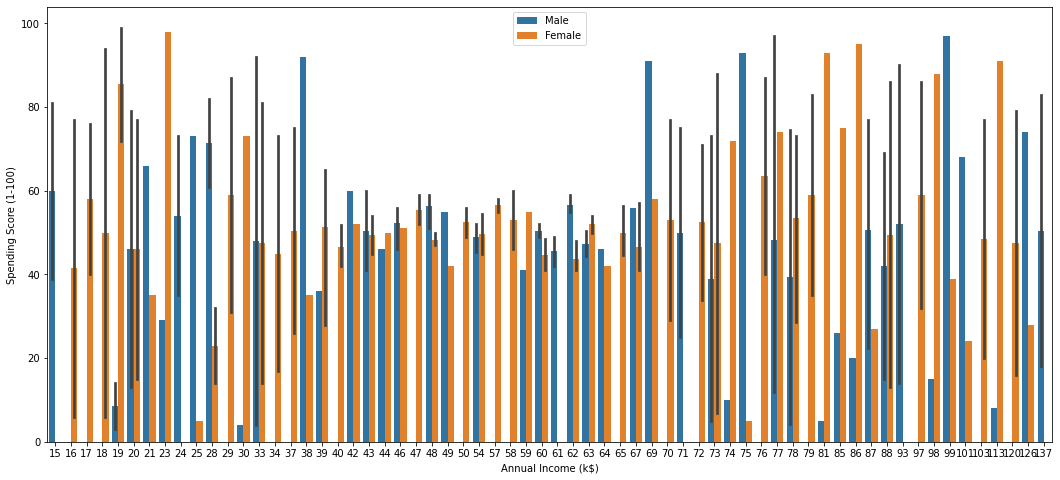

In [12]:
#Lets visualize the dataset
plt.figure(figsize=(18,8))
sns.barplot(y='Spending Score (1-100)', x='Annual Income (k$)',data=custseg,hue='Gender')
plt.legend(loc=0)
plt.show()

No handles with labels found to put in legend.


<Figure size 1296x576 with 0 Axes>

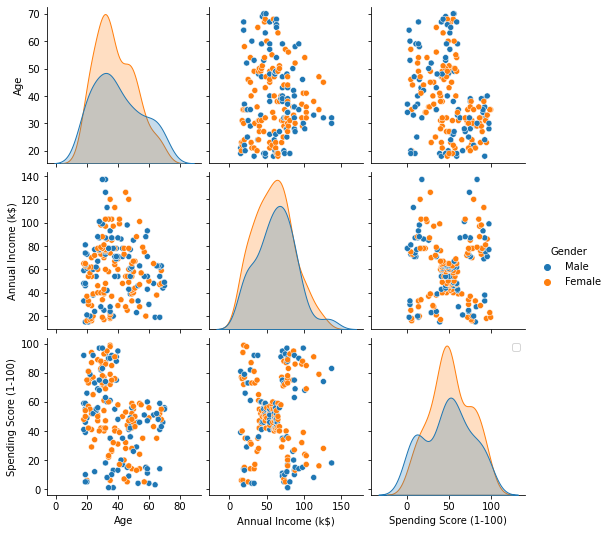

In [15]:
#Lets visualize the dataset
plt.figure(figsize=(18,8))
sns.pairplot(data=custseg,hue='Gender')
plt.legend(loc=0)
plt.show()

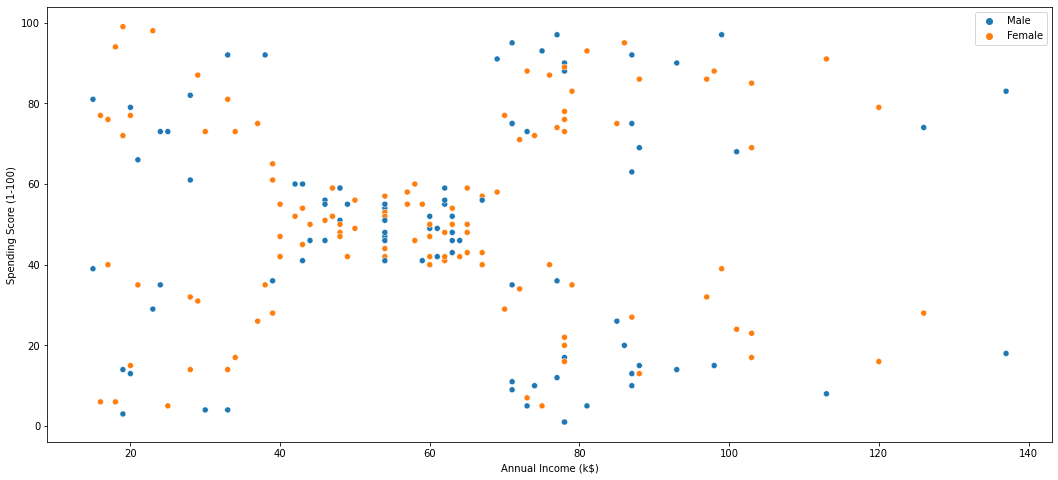

In [16]:
#Lets visualize the dataset
plt.figure(figsize=(18,8))
sns.scatterplot(y='Spending Score (1-100)', x='Annual Income (k$)',data=custseg,hue='Gender')
plt.legend(loc=0)
plt.show()

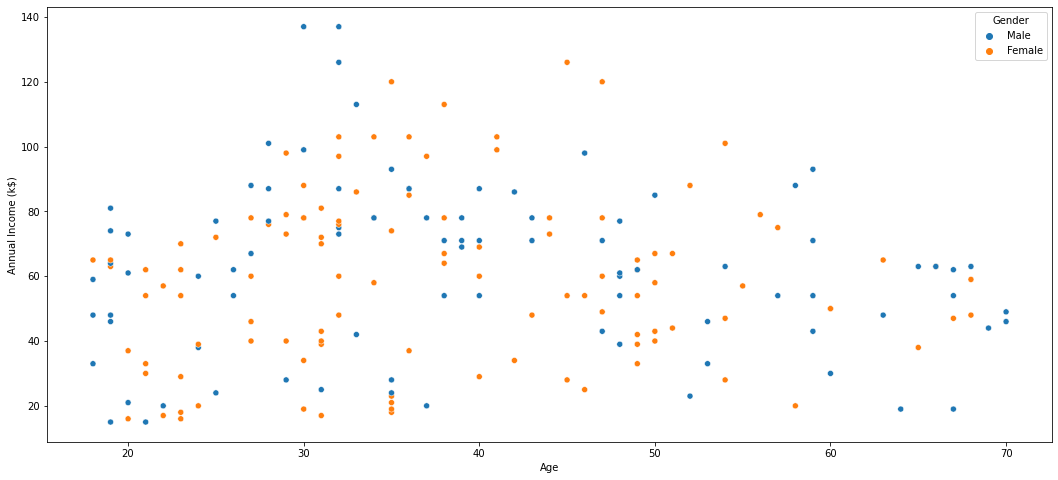

In [24]:
#Checking the income as per the age
plt.figure(figsize=(18,8))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=custseg, hue='Gender')
plt.show()

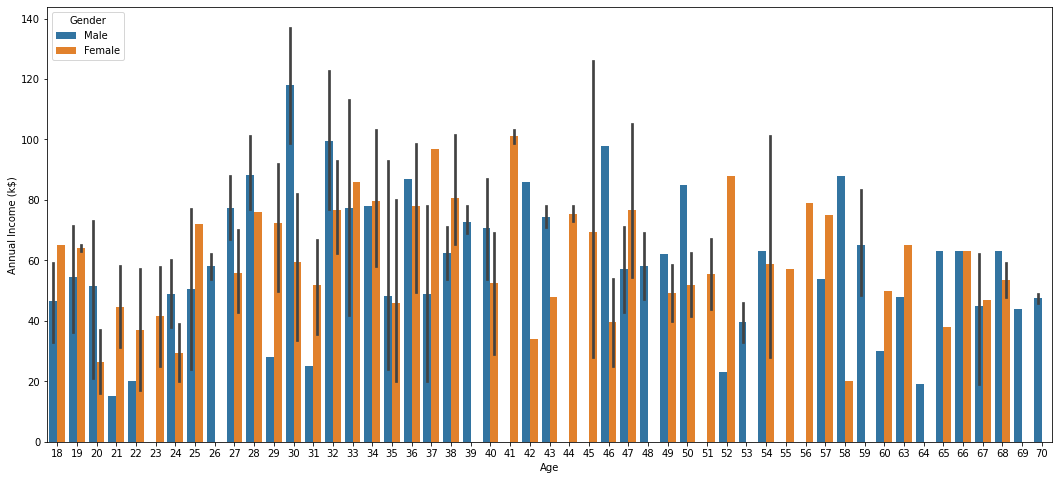

In [26]:
#Checking the income as per the age
plt.figure(figsize=(18,8))
sns.barplot(x='Age', y='Annual Income (k$)', data=custseg, hue='Gender', units=10)
plt.show()

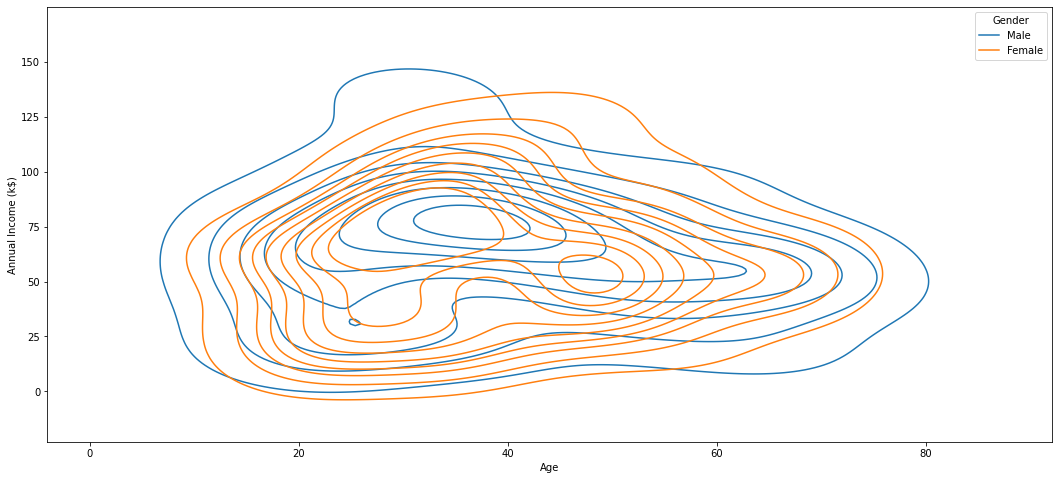

In [30]:
#Checking the income as per the age
plt.figure(figsize=(18,8))
sns.kdeplot(x='Age', y='Annual Income (k$)', data=custseg, hue='Gender')
plt.show()

In [31]:
#Lets import clustering ml model

from sklearn.cluster import KMeans

#### To choose the currect number of clusters we use the sum of squares of the input
For this technique we use WCSS("Within cluster sum of squares")

### Choosing Annual income column and spending score column

In [34]:
custseg.iloc[:,[2,3]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [37]:
x = custseg.iloc[:,[2,3]].values

In [38]:
#Choosing the number of cluster by using WCSS(within cluster sum of square)

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


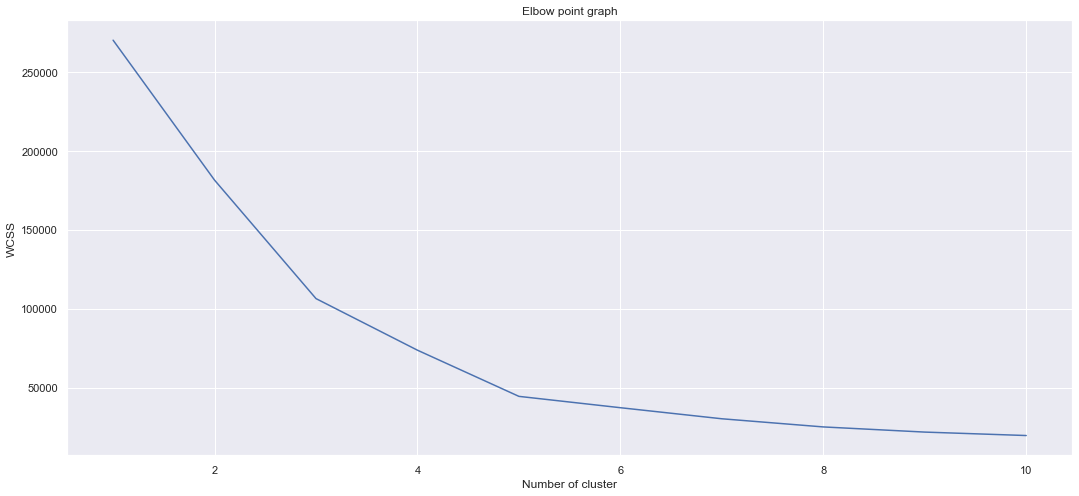

In [41]:
#Pot the elbo graph
sns.set()
plt.figure(figsize=(18,8))
plt.plot(range(1,11),wcss)
plt.title('Elbow point graph')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#The Optimum number of clusters is 5

#Now lets train the k_means model

In [44]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=100)
kmeans.fit(x)

#Return a lable for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


Text(0.5, 1.0, 'Spending vs Annual income')

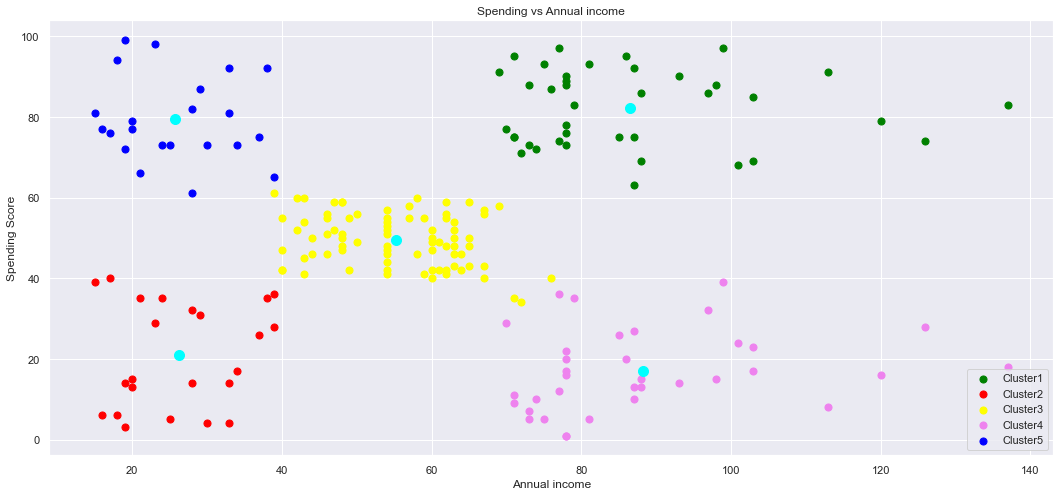

In [55]:
#Visualizing the clusters
plt.figure(figsize=(18,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green', label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red', label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow', label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet', label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue', label='Cluster5')
plt.legend(loc=0)

#Plot the centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='cyan',label='Centroids')

plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('Spending vs Annual income')